In [2]:
"""
# 전처리 배분

1(성준) - 0~9,   40~49, 80~89, 120
2(장호) - 10~19, 50~59, 90~99, 121
3(두영) - 20~29, 60~69, 100~109, 122
4(혜빈) - 30~39, 70~79, 110~119, 123
5(준혁) - bureau.csv, bureau_balance.csv
"""

"""
# 데이터 목록

POS_CASH_balance.csv
application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
installments_payments.csv
previous_application.csv
sample_submission.csv
"""

'\n# 데이터 목록\n\nPOS_CASH_balance.csv\napplication_test.csv\napplication_train.csv\nbureau.csv\nbureau_balance.csv\ncredit_card_balance.csv\ninstallments_payments.csv\nprevious_application.csv\nsample_submission.csv\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 사용자 이름 가져오기
import getpass

# 사용자 이름 저장
user_name = getpass.getuser()

# 서버 이름이 lab10일 때 파일 위치
if user_name == "lab10":
    folder_path = "raw_data/"

# Local에서 파일 위치
elif user_name == "sungjune":
    folder_path = "/Users/sungjune/Downloads/raw_data/"

# 서버 이름이 나머지 일 때 파일 위치
else:
    folder_path = "../lab10/raw_data/"

In [5]:
# Load file "application_train.csv"
train_datasets = pd.read_csv(folder_path+"application_train.csv")

In [6]:
# info
train_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# 전처리 데이터
pre_train_data = train_datasets.copy()

# 데이터 전처리 진행 및 특이사항
---

## "TARGET"
- 연체자가 적은 편향된 데이터
- value_counts()
- 1=연체
> ```python
> 0    282686
> 1     24825
> ```

<hr><br>

## "CODE_GENDER"
- 'M', 'F', 'XNA'
- 'XNA'는 결측치라기 보다는 간성 등으로 파악됨. 따라서 그대로 놔둠
- []숫자로 대치
- 성별
- value_counts()
> ```python
> F      202448
> M      105059
> XNA         4
> ```

<hr><br>

## "FLAG_OWN_CAR", "FLAG_OWN_REALTY"
- 'Y', 'N'
- []숫자로 대치

<hr><br>

## "CNT_CHILDREN"
- [V] 5명 이상인 값을 5 이상으로 처리
- []숫자로 대치
- value_counts()
> ```python
> 0     215371
> 1      61119
> 2      26749
> 3       3717
> 4        429
> 5         84
> 6         21
> 7          7
> 14         3
> 8          2
> 9          2
> 12         2
> 10         2
> 19         2
> 11         1
> ```

<hr><br>

## "AMT_INCOME_TOTAL"
- 117000000 값은 이상치로 판단됨. 대출액 대비 소득 수준을 볼 때 fatfinger로 판단됨
- [V] 117000000 / 10으로 대체함
- <span style="color:yellow">TODO: 편차가 크다고 판단되나, 우선 그대로 진행함</span>


<hr><br>

## "AMT_CREDIT"
- 큰 이상 없다고 판단됨
- <span style="color:yellow">TODO: 편차가 크다고 판단되나, 우선 그대로 진행함</span>

<hr><br>

## "ORGANIZATION_TYPE"
- 무직자를 XNA로 처리함. 문제 없음
```python
pre_train_data.loc[pre_train_data["ORGANIZATION_TYPE"] == "XNA", ("NAME_INCOME_TYPE", "ORGANIZATION_TYPE")].value_counts()
```
> ```python
> NAME_INCOME_TYPE  ORGANIZATION_TYPE
> Pensioner         XNA                  55352
> Unemployed        XNA                     22
> ```

<hr><br>

## "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"
- 외부 자료 출처에 대한 정규화된 점수
- [V] NAN 값이 많으나, 외부 자료에 대한 신뢰성(가중치)를 의미하므로 0으로 처리함

<hr><br>

## 기타 1
#### "APARTMENTS_AVG" 
#### "BASEMENTAREA_AVG" 
#### "YEARS_BEGINEXPLUATATION_AVG" 
#### "YEARS_BUILD_AVG" 
#### "COMMONAREA_AVG"
- 정규화된 자료
- 아파트 평균, 지하 면적 평균, 개발 시작연도 평균, 건물 연령 평균, 공용 공간 평균
- [V] NAN 값이 많으나, 해당 정보가 없는 데이터라고 판단하여 0으로 처리함

<hr><br>

## "FONDKAPREMONT_MODE"
- 뭘 뜻하는 feature인지 알 수 없음
- [V] 결측치를 'not specified'로 대체함.

<hr><br>

## "HOUSETYPE_MODE"
- 결측값 154297
- 나머지 값 분포
```python
block of flats      150503
specific housing      1499
terraced house        1212
```
- <span style="color:red">TODO: 처리 여부 결정</span>

<hr><br>

## 기타 2
#### "FLOORSMIN_MEDI"
#### "LANDAREA_MEDI"
#### "LIVINGAPARTMENTS_MEDI"
#### "LIVINGAREA_MEDI"
#### "NONLIVINGAPARTMENTS_MEDI"
#### "NONLIVINGAREA_MEDI"
#### "TOTALAREA_MODE"

- [V] NAN 값이 많으나, 해당 정보가 없는 데이터라고 판단하여 0으로 처리함

<hr><br>

## "AMT_REQ_CREDIT_BUREAU_QRT"
- 대출 신청 90일~30일 전 고객에 대한 CB 문의 건수
- unique = [  0.  nan   1.   2.   4.   3.   8.   5.   6.   7. 261.  19.]
- 261과 19는 다른 데이터와 비교했을 때 비정상적임. 가장 큰 값인 8로 대체함.


In [9]:
# 자녀가 5명 이상인 값을 5 이상으로 처리 후 숫자로 변환
pre_train_data.loc[pre_train_data["CNT_CHILDREN"] >= 5, "CNT_CHILDREN"] = "5 or more"

# 이상치 117000000에서 0을 하나 제거함
pre_train_data.loc[pre_train_data["AMT_INCOME_TOTAL"] > 1e+08, "AMT_INCOME_TOTAL"] = pre_train_data.loc[pre_train_data["AMT_INCOME_TOTAL"] > 1e+08, "AMT_INCOME_TOTAL"].map(lambda x: x / 10)

# "EXT_SOURCE_1"의 결측치를 0으로 대체함
# 외부 자료의 신뢰성을 의미하는 자료이므로 외부 자료가 없는 것을 의미한다고 판단됨
pre_train_data["EXT_SOURCE_1"].fillna(0, inplace=True)
pre_train_data["EXT_SOURCE_2"].fillna(0, inplace=True)
pre_train_data["EXT_SOURCE_3"].fillna(0, inplace=True)
pre_train_data["FONDKAPREMONT_MODE"].fillna("not specified", inplace=True)

# 결측치를 0으로 대체함
zero_imputation_lists= ["FLOORSMIN_MEDI",
                        "LANDAREA_MEDI",
                        "LIVINGAPARTMENTS_MEDI",
                        "LIVINGAREA_MEDI",
                        "NONLIVINGAPARTMENTS_MEDI",
                        "NONLIVINGAREA_MEDI",
                        "TOTALAREA_MODE",
                        "APARTMENTS_AVG",
                        "BASEMENTAREA_AVG",
                        "YEARS_BEGINEXPLUATATION_AVG",
                        "YEARS_BUILD_AVG",
                        "COMMONAREA_AVG"]
for feature in zero_imputation_lists:
    pre_train_data.loc[:, feature].fillna(0, inplace=True)

# 이상치를 정상값 범위 중 가장 큰 8로 대체함
pre_train_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(8, inplace=True)

# 이상치, 결측치 확인
---

In [10]:
# # 이상치 확인 - BOXPLOT
# sns.set_theme(style="whitegrid")
# sns.boxplot(x=pre_train_data["AMT_CREDIT"])

In [15]:
################### 입력 ###################
feature = "AMT_REQ_CREDIT_BUREAU_QRT"
###########################################

print("=" * 20, "unique", "=" * 20)
print(pre_train_data[feature].unique())
print("=" * 50)

print("=" * 20, "value_counts", "=" * 20)
print(pre_train_data[feature].value_counts())
print("=" * 50)

print("=" * 20, "isna", "=" * 20)
print(pre_train_data[feature].isna().value_counts())
print("=" * 50)

==================== unique ====================
[  0.   8.   1.   2.   4.   3.   5.   6.   7. 261.  19.]
==================== value_counts ====================
0.0      215417
8.0       41526
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
==================== isna ====================
False    307511
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


---

In [20]:
temp = pd.read_csv(folder_path+"bureau.csv")

<AxesSubplot:>

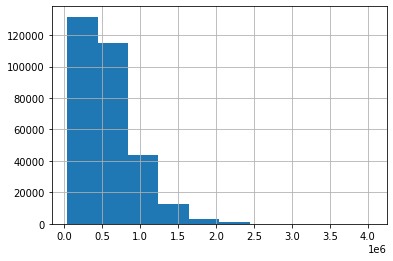

In [40]:
pre_train_data["AMT_GOODS_PRICE"].hist()